# MTH9875 Homework 9

### ShengQuan Zhou

Assigned: October 25, 2018.
Due: November 8, 2018 by 6pm.

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
%\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 

Read the Schoutens et al. paper.

### Load some R-code and data

In [76]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/10/9875-9.zip", 
              destfile="9875-9.zip")
unzip(zipfile="9875-9.zip")

In [77]:
source("BlackScholes.R")
source("Lewis.R")
source("Heston.R")
source("RoughHestonPade.R")
source("plotIvols.R")
source("fwdVarCurve.R")
source("FukasawaRobust.R")

In [78]:
library(repr)
options(repr.plot.height=6,repr.plot.width=10)

For problem 1, you will need SPX implied vols as of the close on September 15, 2005.

In [79]:
load("spxOptData050915.rData") 

As usual, assume zero interest rates and dividends for the following
assignments.

## Comparison of model skews to the SPX volatility skew

### 1. (20 points)


Consider the following fits of the Heston, rough Heston, and SVJ models to the SPX volatility surface as of September 15, 2005:

  |Heston|Rough Heston|SVJ|
-----|-----:|-----:|-------:|
$v$ |0.0174 | |0.0158
$\bar v$ | 0.0354||  0.0439
$\eta$ |  0.3877|0.1924|0.3038
$\rho$  | -0.7165 |-0.6743|-0.6974 
$\lambda$ |1.3253||0.5394 
$H$ ||  0.0119 |
$\lambda_J$| ||0.1308
$\delta$ | ||0.0967 
$\alpha$ |||-0.1151 



(a)

Use the output of the function `plotIvols` to draw a log-log plot of the term structure of the ATM implied volatility skew as of September 15, 2005.  


(b) 

Use the functions `varSwap.Robust` and `xi.curve` to compute a piecewise forward variance curve for September 15, 2005 (see Lecture 6).

(c)

Use your function `atmSkew.phi` from Problem 5 of HW8 to superimpose on the plot from part (a), log-log plots of the term structure of ATM volatility skew for Heston, rough Heston, and SVJ models with the above parameters.  You will need the function `phiSVJ` from Lecture 9.  Also, for the rough Heston characteristic function, use the approximation

`phi.rHeston <- phiRoughHestonDhApprox(params.rHeston, xiCurve, dh.approx=d.h.Pade33, n=20)`

(d) 

Use `plotIvols` to plot the second slice of the volatility surface as of September 15, 2005. Superimpose Heston, rough Heston and SVJ smiles.

(e) 

Comment briefly on these plots in a style suitable for your non-mathematical manager.  Remember to mention the number of model parameters!

### Solution (a)

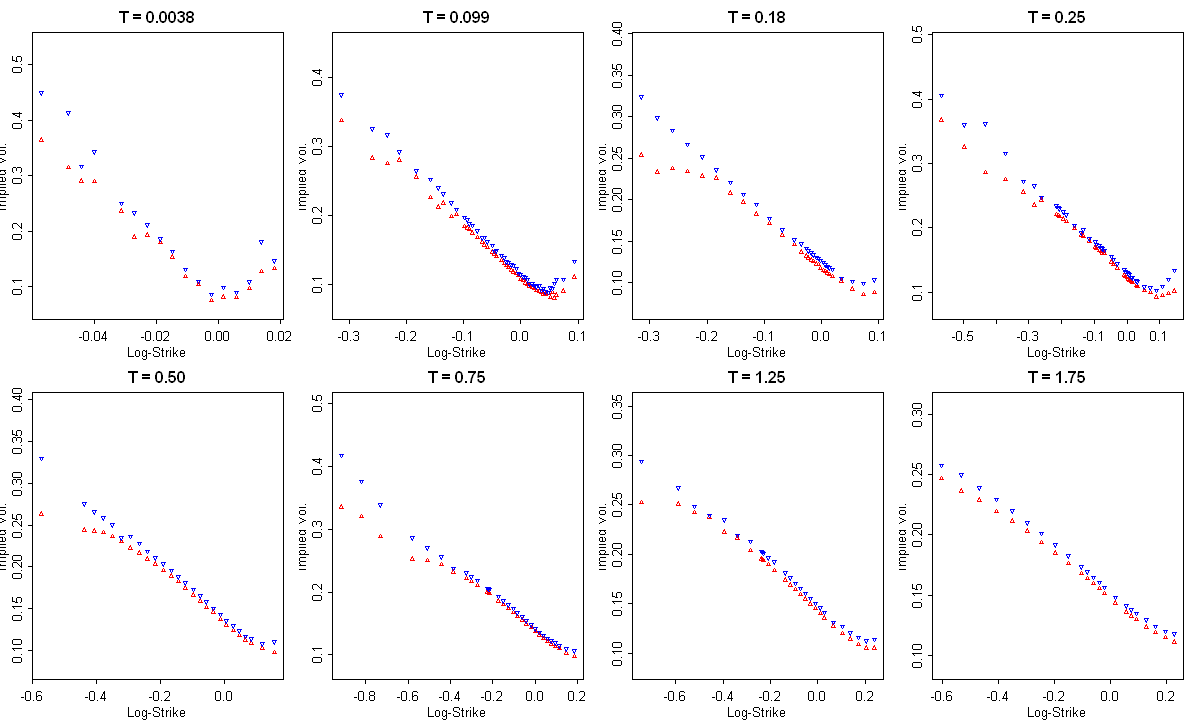

In [81]:
res.plot <- plotIvols(spxOptData)

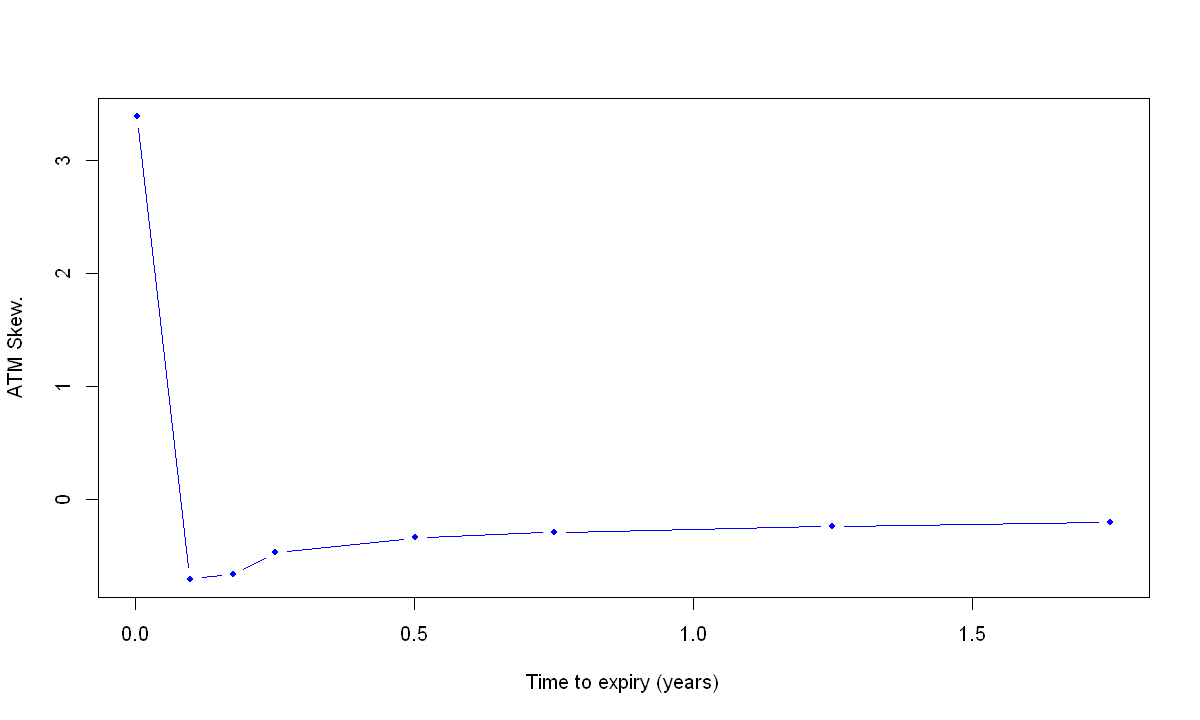

In [82]:
plot(res.plot$expiries,res.plot$atmSkew,type="b",pch=20,col="blue", xlab="Time to expiry (years)",ylab="ATM Skew.")

### Solution (b)

In [83]:
(vs <- varSwap.Robust(spxOptData)$vs.mid)

[1] 0.01328368 0.01640881 0.01874587 0.02069410 0.02298588 0.02488038 0.02683062
[8] 0.02834820

In [84]:
texp <- sort(unique(spxOptData$Texp))

In [85]:
xi.curve.20050915 <- xi.curve(texp,vs*texp)

### Solution (c)

In [86]:
# Define the ATM skew function from the formula 8
atmSkew.phi <- function(phi)
{       
    res <- function(t)
    {
        atmVol <- impvol.phi(phi)(1,t)
        integrand <-  function(u){Im(u*phi(u - 1i/2, t)/(u^2 + 1/4))};
        res <- -integrate(integrand,lower=0,upper=Inf,rel.tol=0.0000000001,subdivisions=1000)$value/sqrt(t)*sqrt(2/pi)*exp(atmVol^2*t/8);
        return(res);
    }
    
    return(res)
}

In [87]:
paramsHeston <- list(lambda = 1.3253, rho = -0.7165, eta = 0.3877, vbar = 0.0354, v = 0.0174)
atmSkew_Heston_Vectorized = Vectorize(atmSkew.phi(phiHeston(paramsHeston)))

In [88]:
params.rHeston <- list(H=0.0119,rho=-0.6743,eta=0.1924)
phi.rHeston <- phiRoughHestonDhApprox(params.rHeston, xi.curve.20050915, dh.approx=d.h.Pade33, n=20)
atmSkew_rHeston_Vectorized = Vectorize(atmSkew.phi(phi.rHeston))

In [89]:
paramsSVJ <- list(lambda=0.5394,eta=0.3038,rho=-0.6974,vbar=0.0439,v=0.0158,lambdaJ=0.1308,alpha=-0.1151,delta=0.0967) 
phiSVJ <- function(params){
    
    lambdaJ <- params$lambdaJ 
    alpha <- params$alpha 
    delta <- params$delta 
    
    function(u, t){
        psiu <- lambdaJ*(-1i*u*(exp(alpha+delta^2/2)-1) + (exp(1i*u*alpha-u^2*delta^2/2)-1))   
        return(phiHeston(params)(u,t)*exp(psiu*t)) 
        }
}
atmSkew_SVJ_Vectorized = Vectorize(atmSkew.phi(phiSVJ(paramsSVJ)))

## <font color='red'>Note: removing the first point in empirical skew term structure for better comparison with models</font>

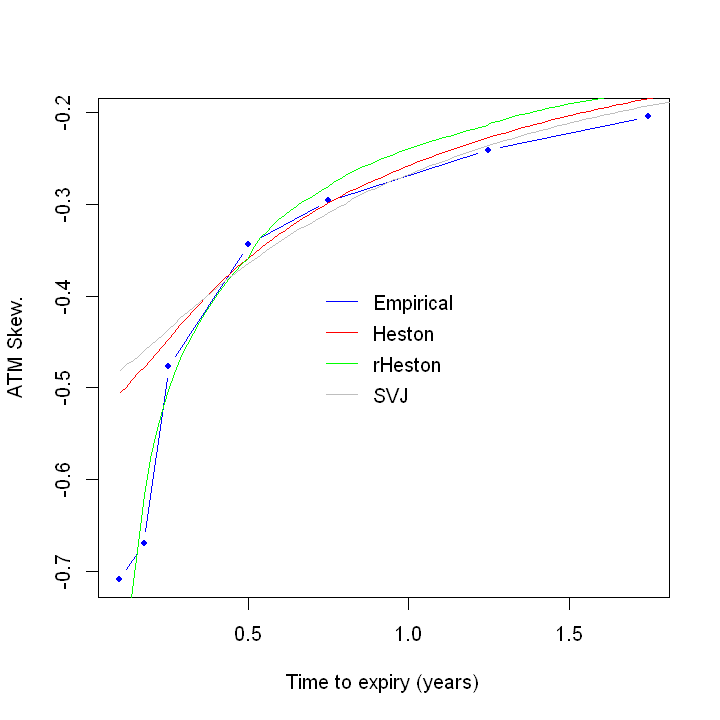

In [90]:
options(repr.plot.height=6,repr.plot.width=6)
plot(res.plot$expiries[2:8],res.plot$atmSkew[2:8],type="b",pch=20,col="blue", xlab="Time to expiry (years)",ylab="ATM Skew.")
curve(atmSkew_Heston_Vectorized(x),from=0.1,to=2,col="red",xlab="Time to expiry (years)", ylab="ATM Skew", add=TRUE)
curve(atmSkew_rHeston_Vectorized(x),from=0.1,to=2,col="green",xlab="Time to expiry (years)", ylab="ATM Skew", add=TRUE)
curve(atmSkew_SVJ_Vectorized(x),from=0.1,to=2,col="gray",xlab="Time to expiry (years)", ylab="ATM Skew", add=TRUE)
legend("center",c("Empirical","Heston", "rHeston", "SVJ"),lty=1,bty='n', y.intersp=1.5,cex=1,col=c("blue", "red", "green", "gray"))

### Solution (d)

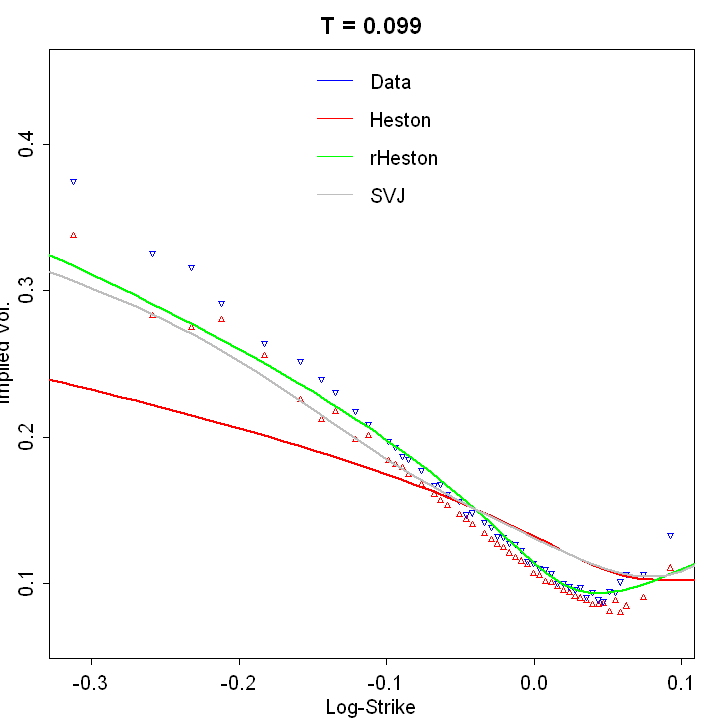

In [91]:
options(repr.plot.height=6,repr.plot.width=6)

xrange <- c(-.35,.15);  yrange <- c(.05,.4) 

res2 <- plotIvols(spxOptData, slices=2)

vol <- function(k){sapply(k,function(x){impvol.phi(phiHeston(paramsHeston))(x,0.099)})}
curve(vol(x),from=-.5,to=.5,col='red',add=T,lwd=2)

vol <- function(k){sapply(k,function(x){impvol.phi(phi.rHeston)(x,0.099)})}
curve(vol(x),from=-.5,to=.5,col='green',add=T,lwd=2)

vol <- function(k){sapply(k,function(x){impvol.phi(phiSVJ(paramsSVJ))(x,0.099)})}
curve(vol(x),from=-.5,to=.5,col='gray',add=T,lwd=2)

legend("top",c("Data","Heston", "rHeston", "SVJ"),lty=1,bty='n', y.intersp=1.5,cex=1,col=c("blue", "red", "green", "gray"))

### Solution (e)

For the ATM skew, only rHeston is able to capture the large curvature in short expiries.

For the smile, both SVJ and rHeston fit well, while Heston does not fit. That being said, rHeston has a much smaller number of parameters than SVJ.

## Stochastic time change

### 2. (8 points) 

Consider the following model of the stock price:

$$
S_t = S_0\,\exp\left\{\sigma\,W(\tau_t)-\frac12\,\sigma^2\,\tau_t\right\}
$$

where $W(\tau_t)$ is time-changed Brownian motion.  The time-change $\tau$ is given by

$$
\tau_t = 
\left\{
\begin{array}{ll}
 \theta_1\,t& \text{ with probability } 1/2  \\
\theta_2\,t & \text{ with probability } 1/2.
\end{array}
\right.
$$

Note that the time-change is independent of the Brownian motion $W$.

(a)

Compute the characteristic function 

$$
\phi_{\tau_t}(u) = \ee{e^{i\,u\,\tau_t}}
$$

of the time-change.

(b)

Use equation (5) of Lecture 7 to compute the characteristic function 

$$
\phi_T(u) = \ee{e^{i\,u\,x_T}}= \frac 12 \,\left\{e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}.
$$

with $x_t = \log S_t/S_0$.

(c)

Without explicit computation, deduce the fair value $C(S,K,T)$ of a European-style call option with strike $K$ and time to expiry $T$ in this model.

Hint: Note that the characteristic function is the sum of two simple ones.

(d) Rederive your result in part (c) by conditioning on total variance, Hull-White style.

### Solution (a)

$$
\phi_{\tau_t}(u) = \ee{e^{i\,u\,\tau_t}}= \frac 12 e^{i\,u\,\theta_1\,t}+\frac 12 e^{i\,u\,\theta_2\,t}
$$

### Solution (b)

$$
\phi_{Y_t}(u) = \mathbb{E}\left[e^{i\,u\,Y_t}\right] = \mathbb{E}\left[\mathbb{E}\left[\left.e^{i\,u\,X(\theta)}\right|\theta=\tau_t\right]\right]= \mathbb{E}\left[e^{\psi_X(u)\,\tau_t}\right] = \phi_{\tau_t}\left(-i\,\psi_X(u)\right)
$$
Since
$$X=\log \frac{S_t}{S_0} =\sigma\,W_t-\frac12\,\sigma^2\,t \Rightarrow {\mathbb{E}\left[e^{i\,u\,X}\right]}=e^{-\frac12\,u\,(u+i)\,\sigma^2\,}$$
we have
$$
\phi_T(u) = \phi_{\tau_T}\left(i (-i\,\log{\mathbb{E}\left[e^{i\,u\,X}\right]})\tau_T\right)= \frac 12 \,\left\{e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_1\,T}+ e^{-\frac12\,u\,(u+i)\,\sigma^2\,\theta_2\,T} \right\}.
$$

### Solution (c)

Formula of Lewis
$$
C(S,K,T;\phi_T)=S-\sqrt{SK}\frac{1}{\pi}\int_0^\infty\frac{du}{u^2+\frac{1}{4}}
\,\mathrm{Re}\left[e^{-iuk}\phi_T\left(u-i/2\right)\right].
$$

$C(S,K,T;\phi_T)$ is a linear combination of BS value, which is 

$$C(S,K,T;\phi_T)=\frac 12 C(S,K,\theta_1\,T;\phi_{BS})+\frac 12 C(S,K,\theta_2\,T;\phi_{BS})=\frac 12 C_{BS}(S,K,\sigma\sqrt{\theta_1\,T})+\frac 12 C_{BS}(S,K,\sigma\sqrt{\theta_2\,T})$$

### Solution (d)

$$
C(k,v,T)=\mathbb{E}_{w_T}\left[C_{BS}(k,w)\right] = \mathbb{E}_{w_T}\left[\mathbb{E}_{S_w}\left[(S_w-K)^+\right]\right],
$$

where
 

$$
w_t = 
\left\{
\begin{array}{ll}
\sigma^2\theta_1\,T,& \text{ with probability } 1/2,  \\
\sigma^2\theta_2\,T, & \text{ with probability } 1/2.
\end{array}
\right.
$$

and  $w_T=\int_0^T\,v_t\,dt$. Thus,

$$C(S,K,T)=\frac 12 C_{BS}(S,K,\sigma\sqrt{\theta_1\,T})+\frac 12 C_{BS}(S,K,\sigma\sqrt{\theta_2\,T}).$$